#### Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth


C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df1=pd.read_csv("Electric_vehicle_dataset.csv")
df1['inr(10e3)']=df1['PriceEuro']*91.19
df1['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

C:\Users\Lenovo_ThinkPad\AppData\Local\Temp\ipykernel_5368\2248127483.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Lenovo_ThinkPad\AppData\Local\Temp\ipykernel_5368\2248127483.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [3]:
df1.head()

Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_Km  Efficiency_WhKm FastCharge_KmH  RapidCharge PowerTrain  \
0       450              161            940            1        AWD   
1       270              167            250            1        RWD   
2       400              181            620            1        AWD   
3       360              206            560            1        RWD   
4       170              168            190            1        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro   inr(10e3)  
0  Type 2 CCS      Sedan       D      5      55480  5059221.20  
1  Type 2 CCS  Hatchback       C      5      30000  2735700.00  
2  Type 2 CCS   Liftback       D      5      56440  5146763.60  
3  Type 2 CCS        SUV       D      5      68040  6204567.60  
4  Type 2 CCS  Hatchback       B      4      32997  3008996.43

### Information about the dataset

In [4]:

'''
Brand: The manufacturer or brand of the electric vehicle.
Model: The specific model name of the electric vehicle.
PriceEuro: The price of the vehicle in Euros.
AccelSec: Acceleration time in seconds, typically from 0 to 100 km/h.
TopSpeed_KmH: The maximum speed of the vehicle in kilometers per hour.
Range_Km: The range of the vehicle on a full charge, measured in kilometers.
Efficiency_WhKm: The efficiency of the vehicle, measured in watt-hours per kilometer.
FastCharge_KmH: The range in kilometers that can be added per hour of fast charging.
RapidCharge: A binary indicator (Yes/No) of whether the vehicle supports rapid charging.
PowerTrain: The type of powertrain used by the vehicle (e.g., all-wheel drive, rear-wheel drive).
PlugType: The type of plug used for charging the vehicle (e.g., Type 2, CCS).
BodyStyle: The body style of the vehicle (e.g., SUV, Sedan, Hatchback).
Segment: The market segment of the vehicle (e.g., luxury, compact).
'''

'\nBrand: The manufacturer or brand of the electric vehicle.\nModel: The specific model name of the electric vehicle.\nPriceEuro: The price of the vehicle in Euros.\nAccelSec: Acceleration time in seconds, typically from 0 to 100 km/h.\nTopSpeed_KmH: The maximum speed of the vehicle in kilometers per hour.\nRange_Km: The range of the vehicle on a full charge, measured in kilometers.\nEfficiency_WhKm: The efficiency of the vehicle, measured in watt-hours per kilometer.\nFastCharge_KmH: The range in kilometers that can be added per hour of fast charging.\nRapidCharge: A binary indicator (Yes/No) of whether the vehicle supports rapid charging.\nPowerTrain: The type of powertrain used by the vehicle (e.g., all-wheel drive, rear-wheel drive).\nPlugType: The type of plug used for charging the vehicle (e.g., Type 2, CCS).\nBodyStyle: The body style of the vehicle (e.g., SUV, Sedan, Hatchback).\nSegment: The market segment of the vehicle (e.g., luxury, compact).\n'

In [5]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [6]:
from ydata_profiling import ProfileReport

In [7]:
profile = ProfileReport(df1, title="Profiling Report")

In [8]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### In the above section, I used the Pandas profiling to give an overview of the dataset with a basic EDA.

#### Manually also performing a data cleaning process

In [4]:
## Checking the shape of the data

df1.shape

(103, 15)

In [5]:
## Checking the missing values
df1.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
inr(10e3)          0
dtype: int64

In [170]:
## Checking the duplicates in the column
df1.duplicated().sum()

0

In [171]:
## Information of the type of data in seach column
print(f'Infomation about your data:')
print(df1.info())

Infomation about your data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(6), object(7)
memory usage: 12.2+ KB
None


In [6]:
#### Descriptive Statistics of the dataset

print(f'Statistics summary:')
df1.describe().T

Statistics summary:


count          mean           std         min          25%  \
AccelSec         103.0  7.396117e+00  3.017430e+00        2.10        5.100   
TopSpeed_KmH     103.0  1.791942e+02  4.357303e+01      123.00      150.000   
Range_Km         103.0  3.387864e+02  1.260144e+02       95.00      250.000   
Efficiency_WhKm  103.0  1.891650e+02  2.956684e+01      104.00      168.000   
RapidCharge      103.0  9.514563e-01  2.159630e-01        0.00        1.000   
Seats            103.0  4.883495e+00  7.958344e-01        2.00        5.000   
PriceEuro        103.0  5.581156e+04  3.413467e+04    20129.00    34429.500   
inr(10e3)        103.0  5.089456e+06  3.112740e+06  1835563.51  3139626.105   

                       50%        75%         max  
AccelSec               7.3        9.0        22.4  
TopSpeed_KmH         160.0      200.0       410.0  
Range_Km             340.0      400.0       970.0  
Efficiency_WhKm      180.0      203.0       273.0  
RapidCharge            1.0        1.0         1.0  
Seats                  5.0        5.0         7.0  
PriceEuro          45000.0    65000.0    215000.0  
inr(10e3)        4103550.0  5927350.0  19605850.0

In [7]:
df1['Brand'].unique()
df1['Brand'].value_counts()

Brand
Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: count, dtype: int64

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



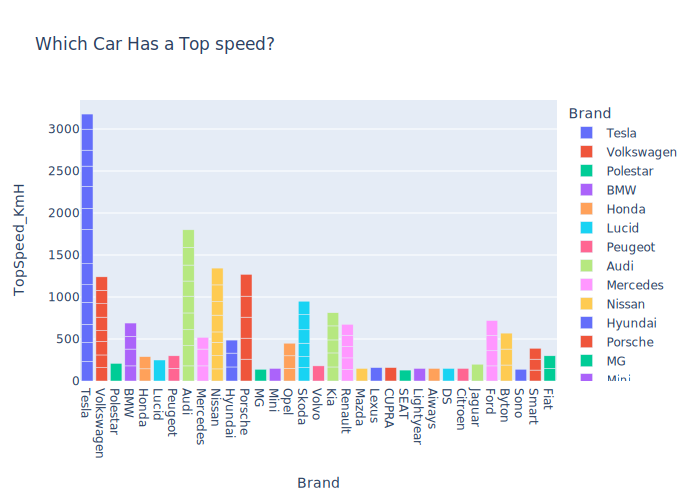

In [174]:
fig = px.bar(df1,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)

In [8]:
df1['Model'].unique()
df1['Model'].value_counts()

Model
e-Soul 64 kWh                    2
Model 3 Long Range Dual Motor    1
Mustang Mach-E ER RWD            1
Sion                             1
M-Byte 95 kWh 4WD                1
                                ..
e-Niro 64 kWh                    1
e-tron 50 quattro                1
e-2008 SUV                       1
i3 120 Ah                        1
M-Byte 95 kWh 2WD                1
Name: count, Length: 102, dtype: int64

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



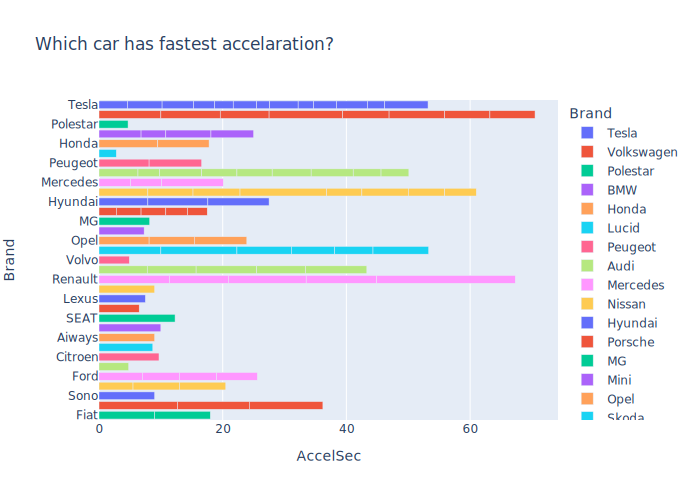

In [9]:
fig = px.bar(df1,x='AccelSec',y = 'Brand',color = 'Brand',title = 'Which car has fastest accelaration?',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)

<Axes: title={'center': 'Car Price'}, xlabel='No. of Samples', ylabel='Car Price'>

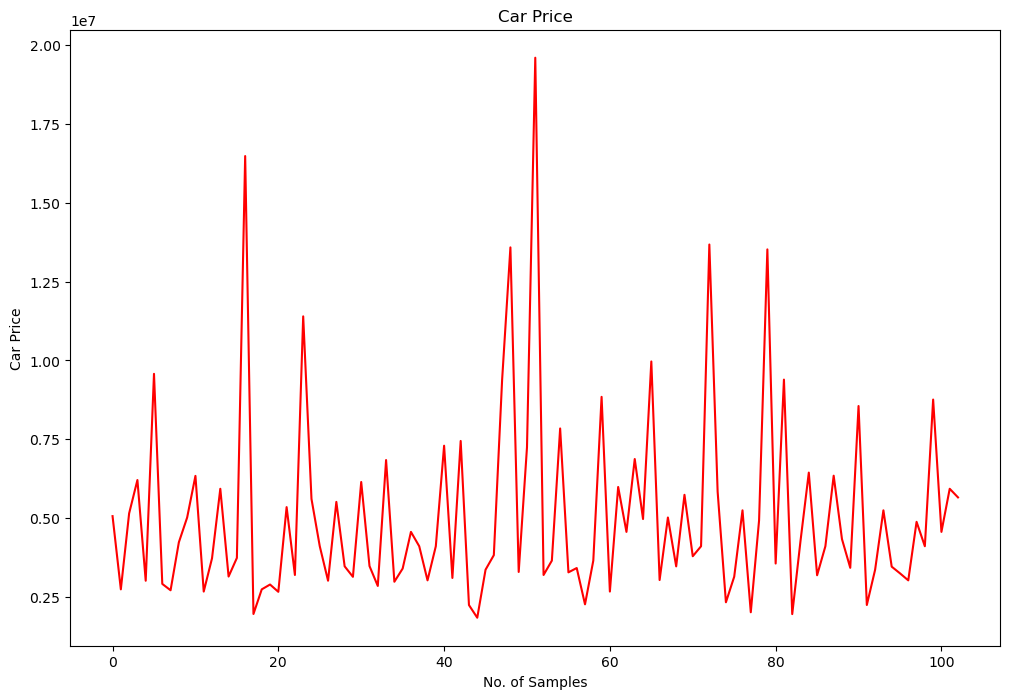

In [176]:
df1['inr(10e3)'].plot(figsize = (12,8),title='Car Price',xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'red')

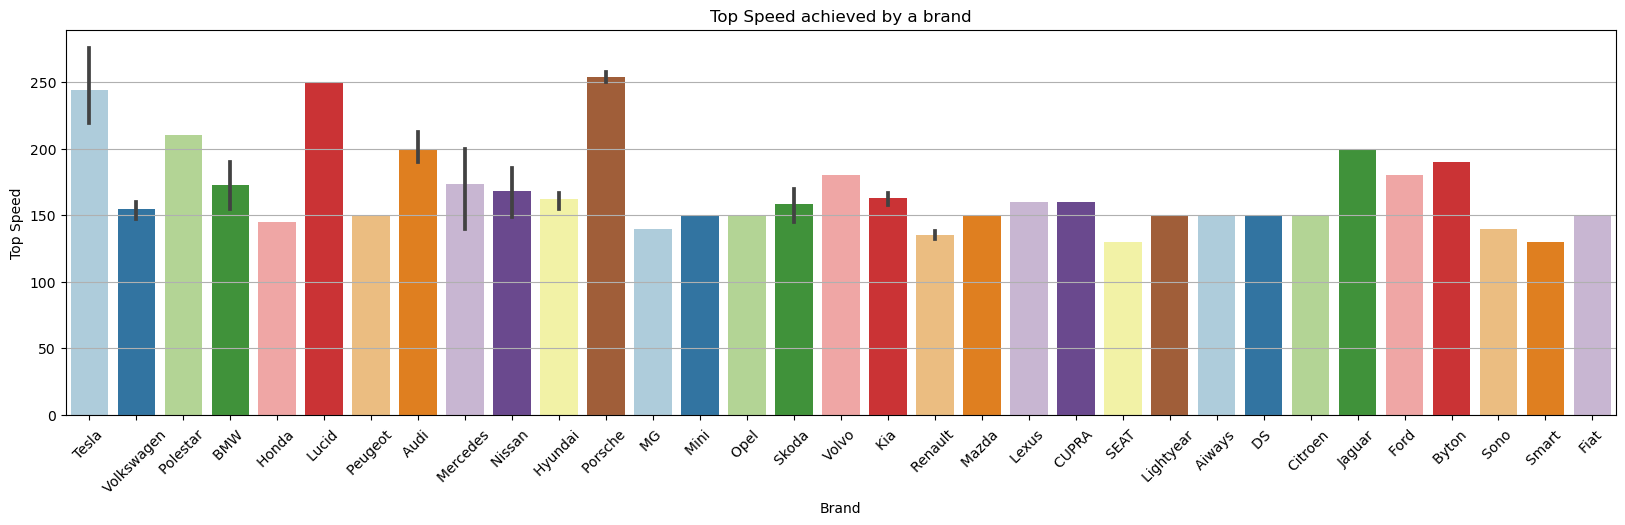

In [10]:
##  Second approach through Barplot
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df1,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)
plt.show()

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

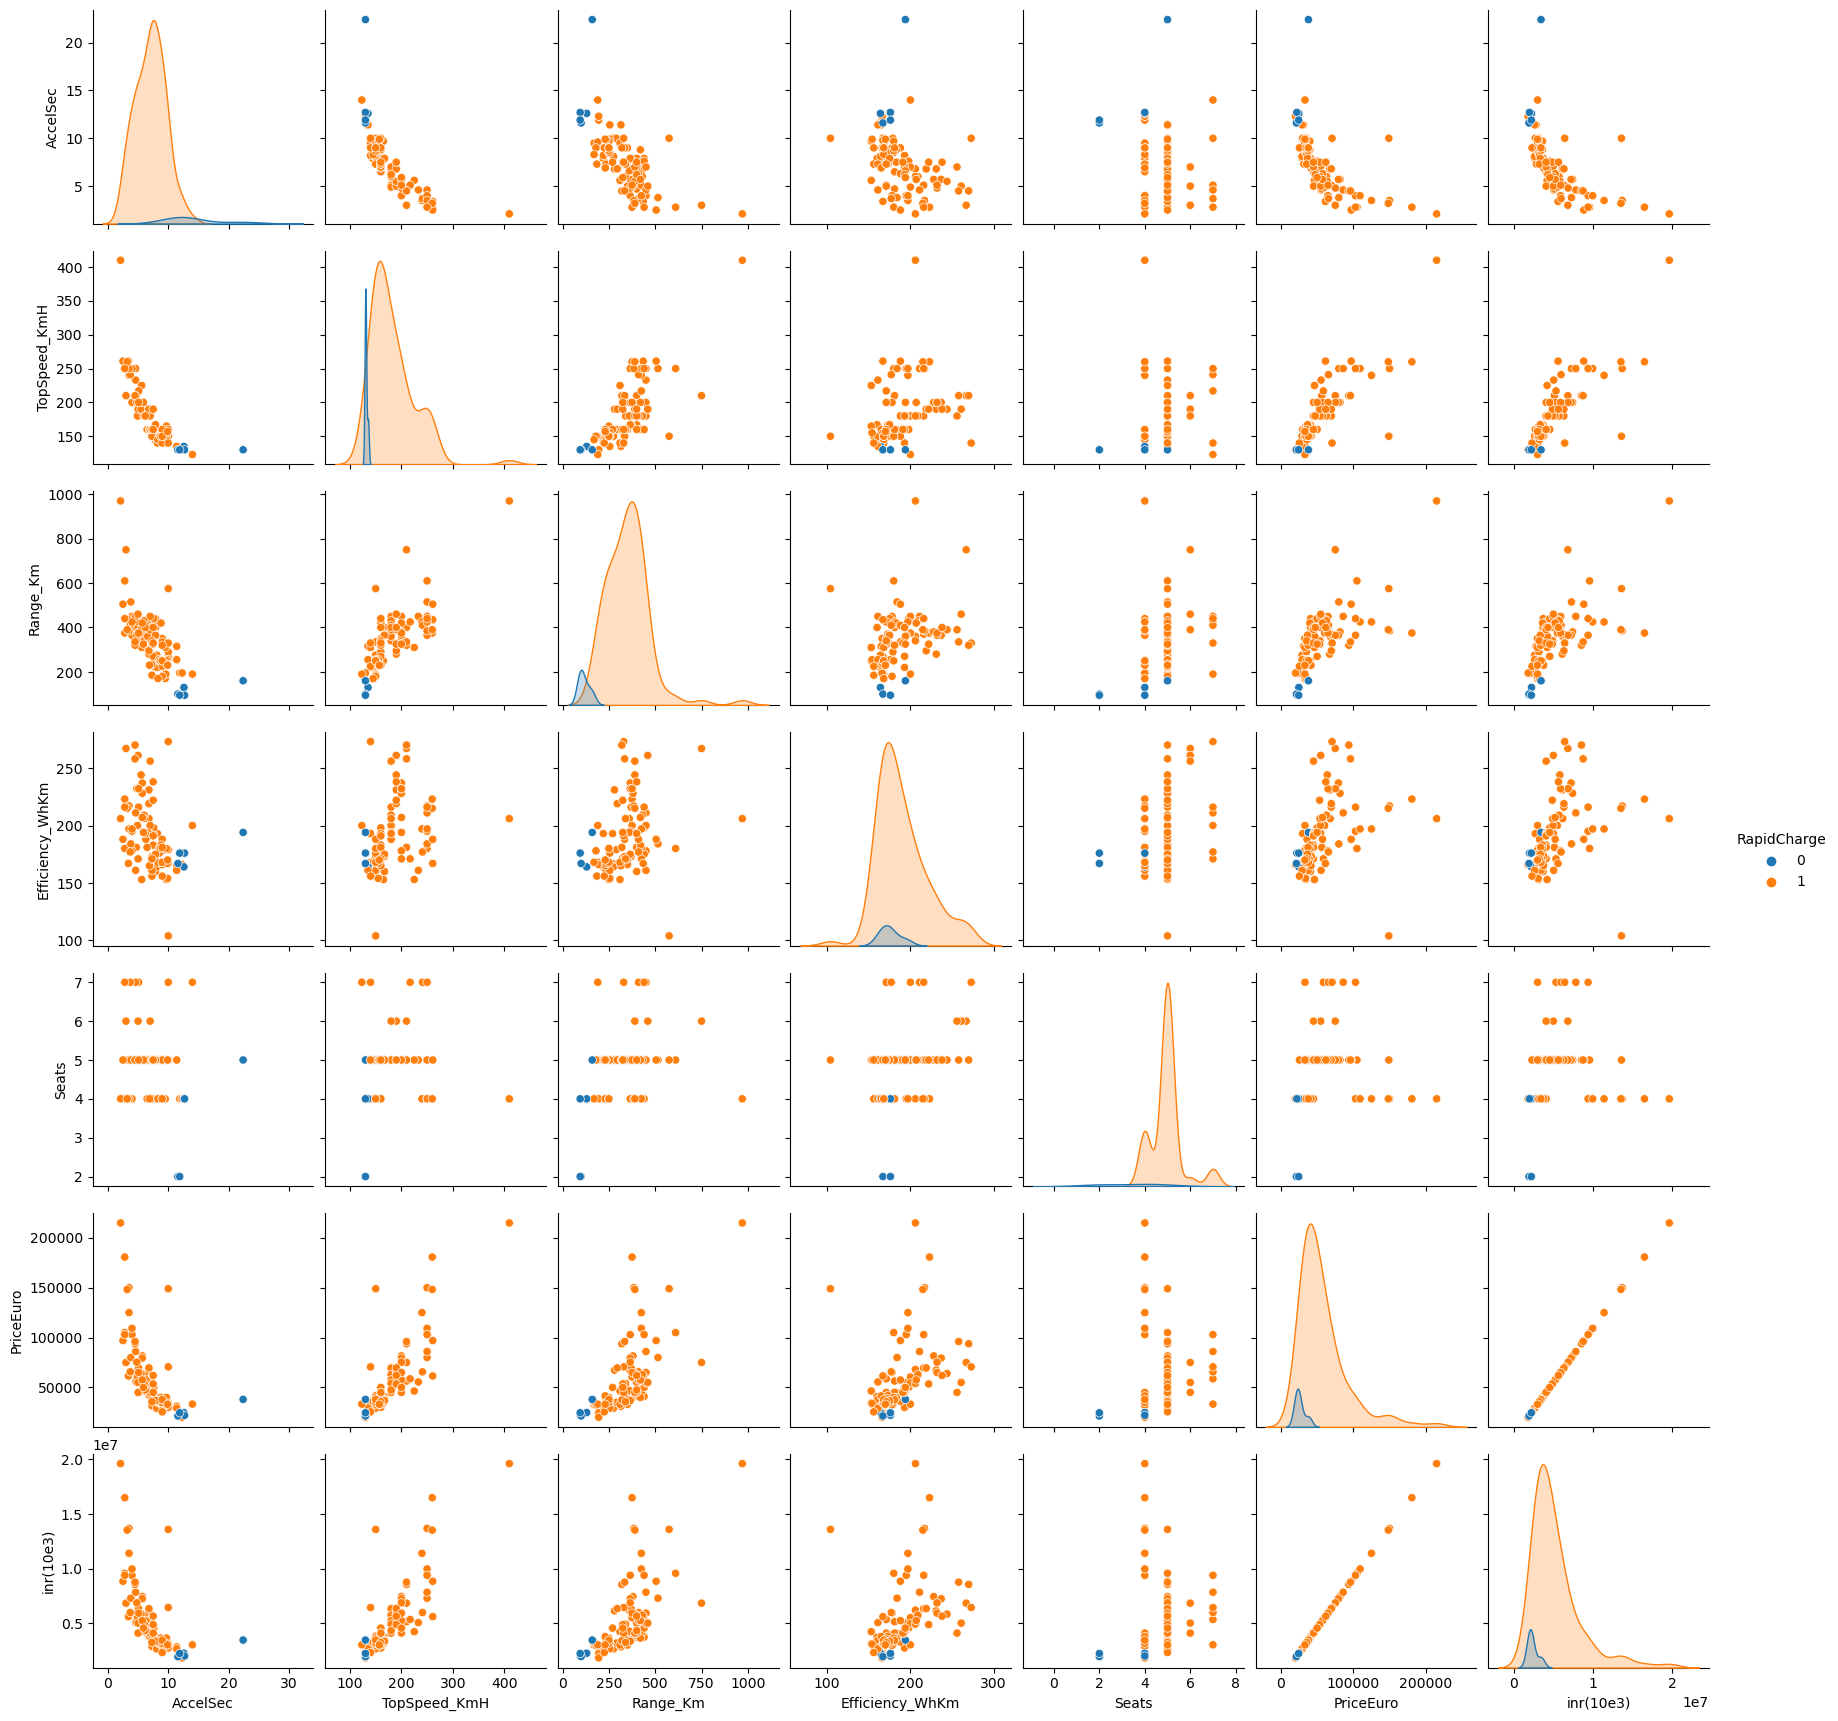

In [178]:
#### Pairplot of all the columns based on Rapid Charger presence
sns.pairplot(df1, hue='RapidCharge')

In [11]:
new_df = df1[['AccelSec', 'TopSpeed_KmH', 'Range_Km','Efficiency_WhKm','RapidCharge','Seats','inr(10e3)']].copy()

In [12]:
new_df.head()

AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  RapidCharge  Seats  \
0       4.6           233       450              161            1      5   
1      10.0           160       270              167            1      5   
2       4.7           210       400              181            1      5   
3       6.8           180       360              206            1      5   
4       9.5           145       170              168            1      4   

    inr(10e3)  
0  5059221.20  
1  2735700.00  
2  5146763.60  
3  6204567.60  
4  3008996.43

<Axes: >

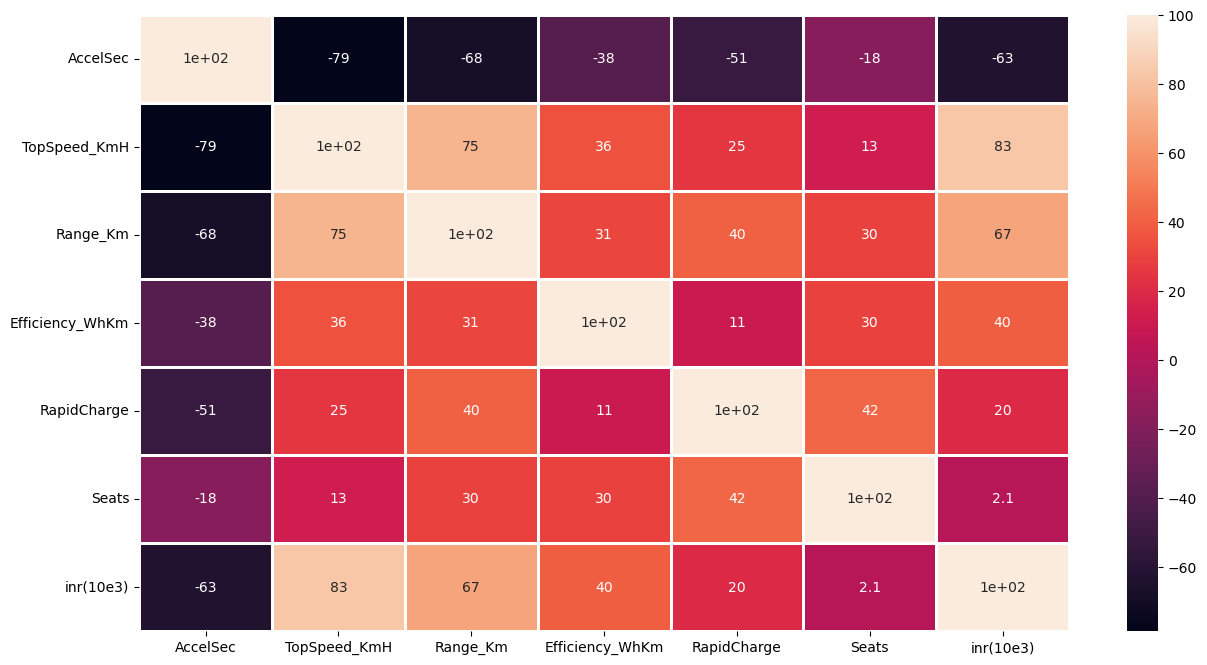

In [13]:
## Checking the corelation with heatmap
ax= plt.figure(figsize=(15,8))
sns.heatmap(new_df.corr()*100,linewidths=1,linecolor='white',annot=True)

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



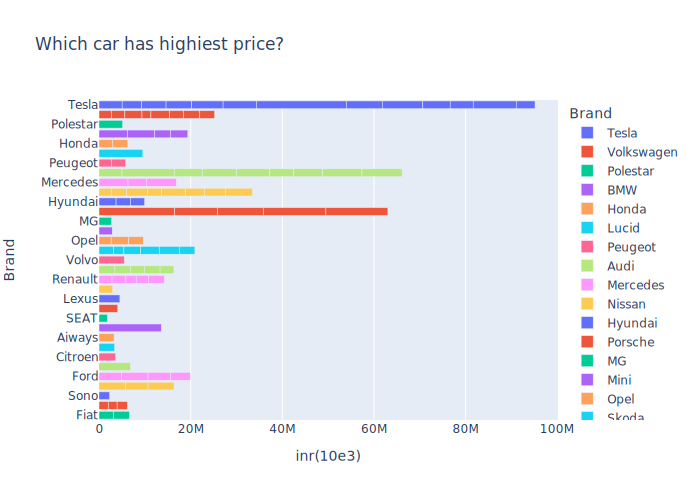

In [14]:
### Brand comparison with Price 
fig = px.bar(df1,x='inr(10e3)',y = 'Brand',color = 'Brand',title = 'Which car has highiest price?',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)

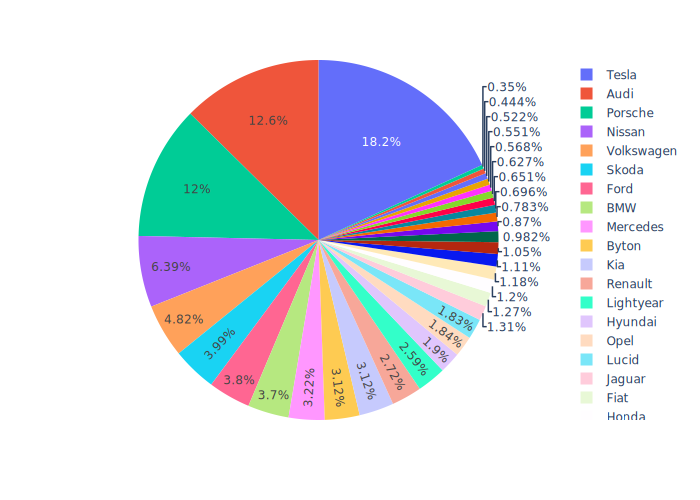

In [15]:
## Comparing price with Brand in percentageise
fig = px.pie(df1,names = 'Brand',values = 'inr(10e3)')
pio.show(fig)

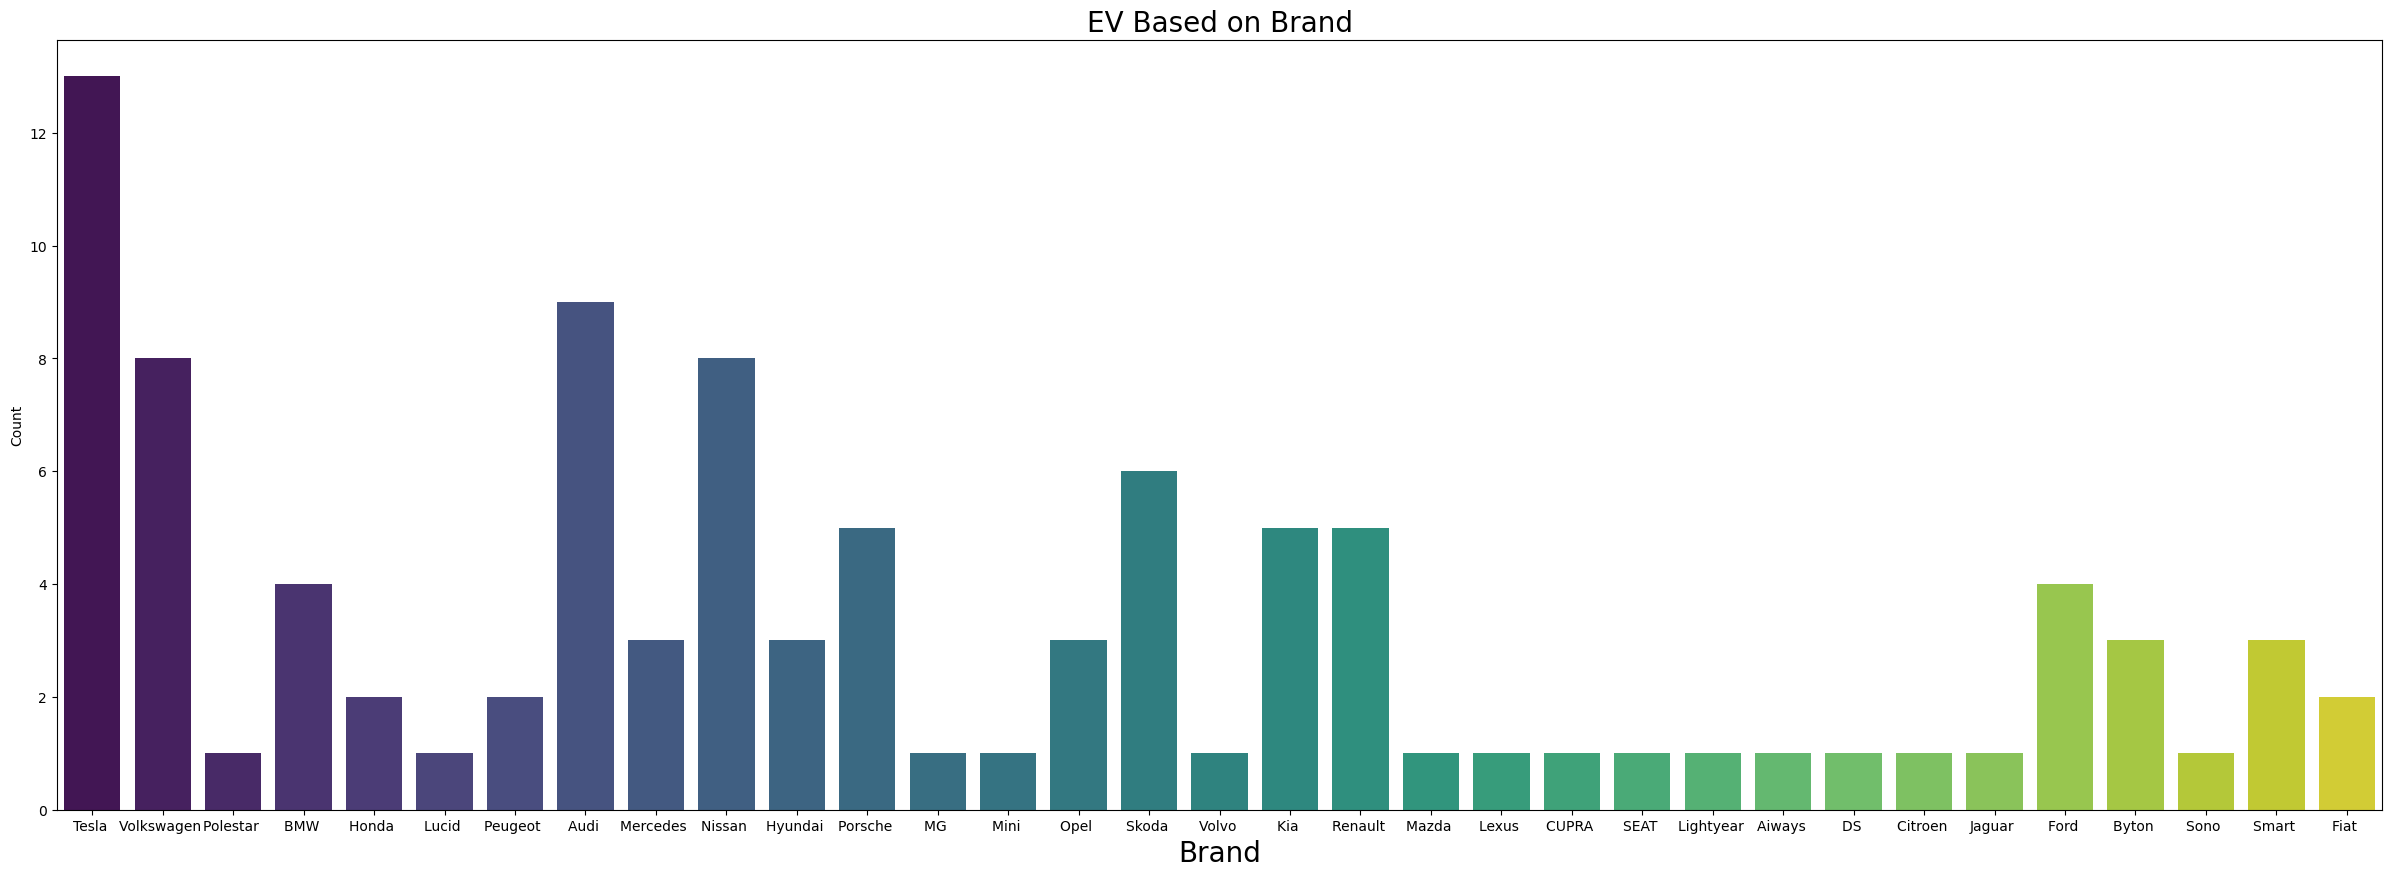

In [16]:
plt.figure(figsize=(30,10))
sns.countplot(x='Brand', data=df1, palette='viridis')
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Count')
plt.title('EV Based on Brand', fontsize=20)
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

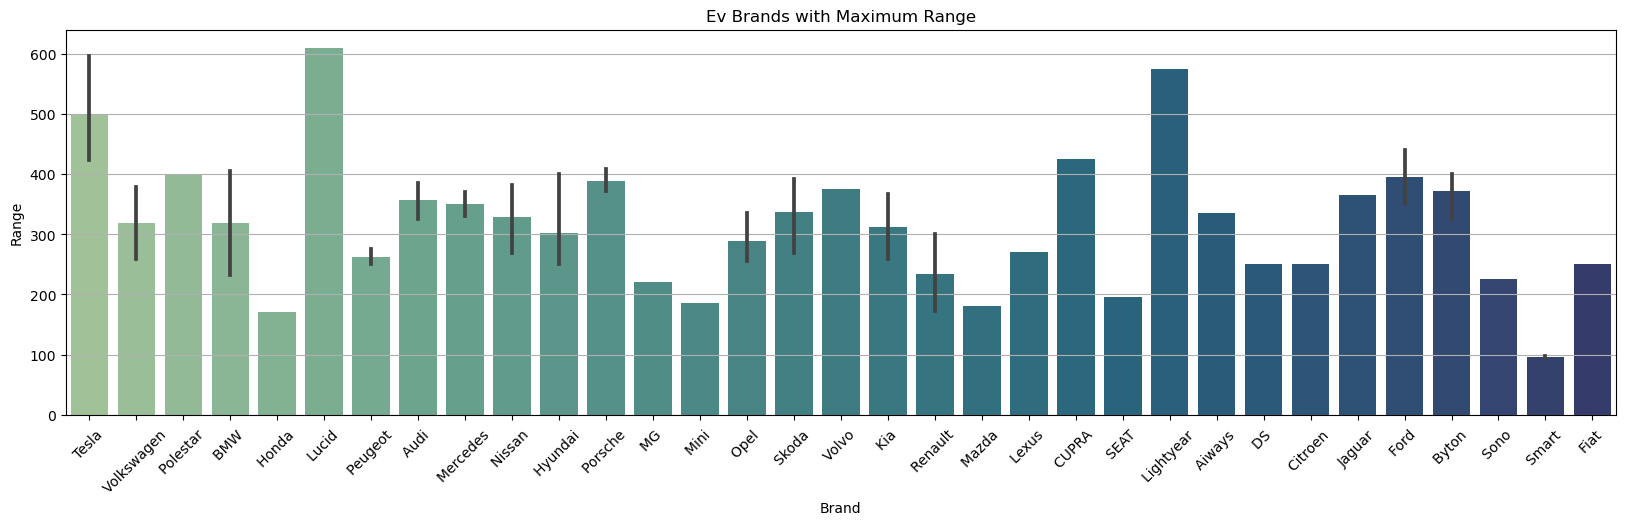

In [187]:
plt.figure(figsize=(20,5))
sns.barplot(x='Brand', y='Range_Km', data=df1, palette="crest")
plt.grid(axis='y')
plt.title('Ev Brands with Maximum Range')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

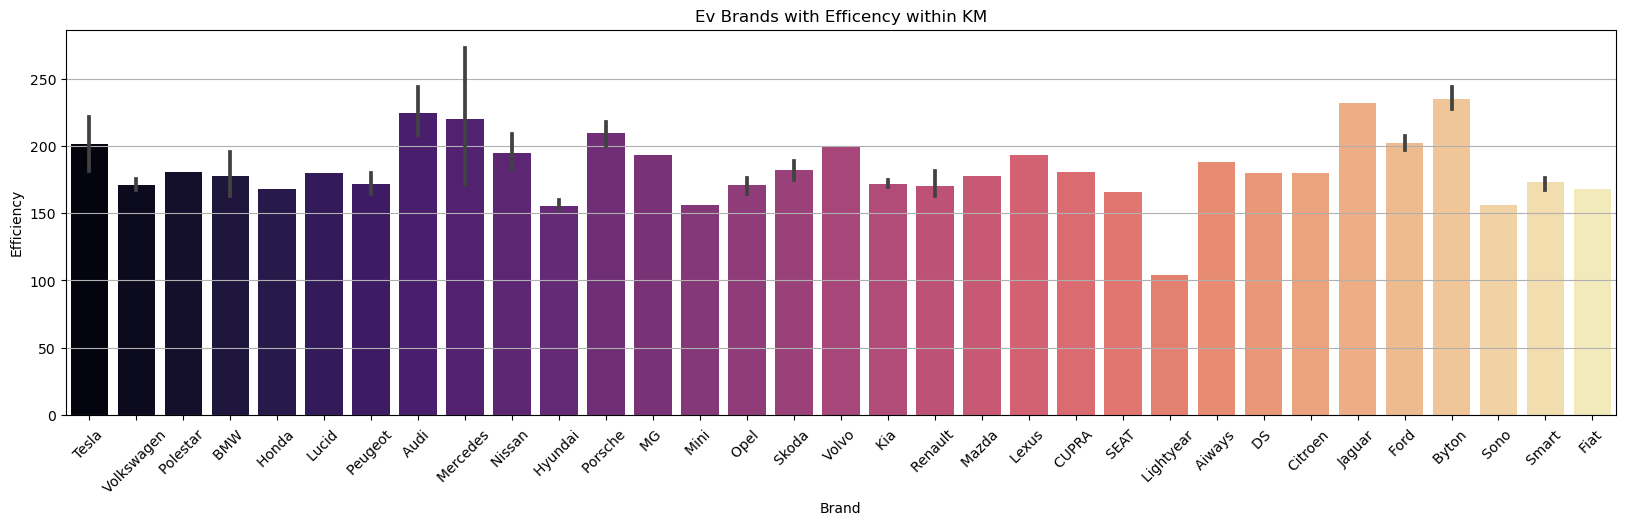

In [17]:
plt.figure(figsize=(20,5))
sns.barplot(x='Brand', y='Efficiency_WhKm', data=df1, palette="magma")
plt.grid(axis='y')
plt.title('Ev Brands with Efficency within KM')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

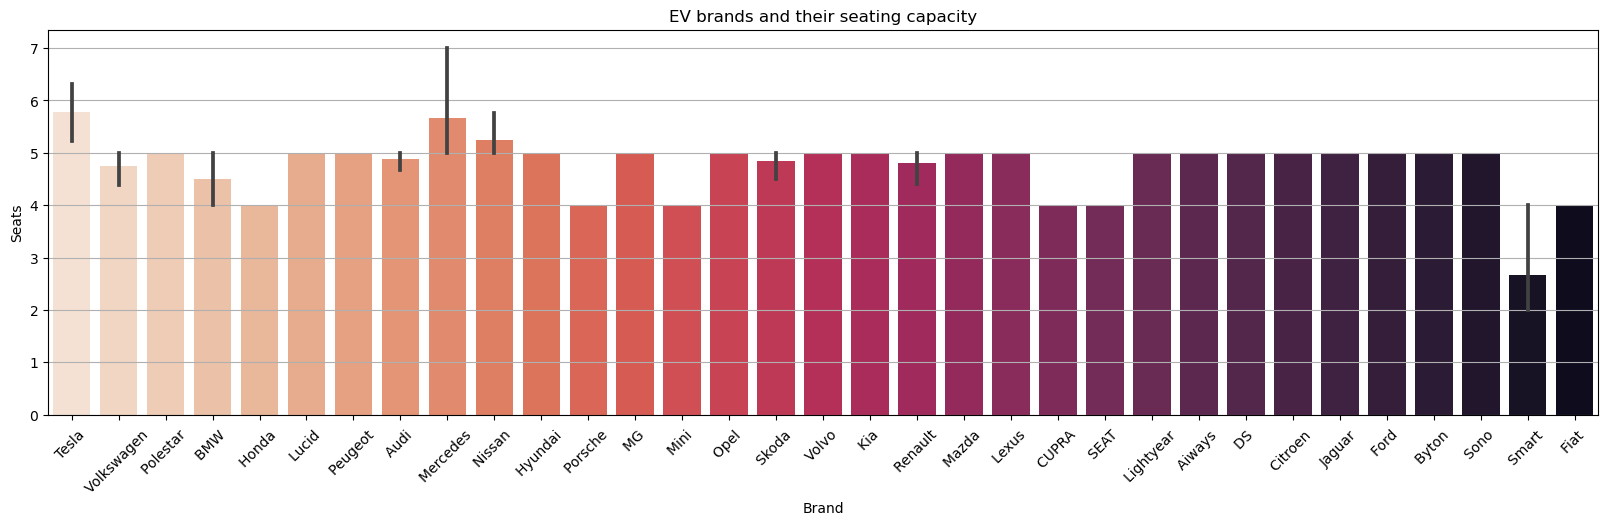

In [145]:
plt.figure(figsize=(20,5))
sns.barplot(x='Brand', y='Seats', data=df1, palette="rocket_r")
plt.grid(axis='y')
plt.title('EV brands and their seating capacity')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)
plt.show

### Mercedes, Tesla and Nissan have the highest number of seats and Smart the lowest

<function matplotlib.pyplot.show(close=None, block=None)>

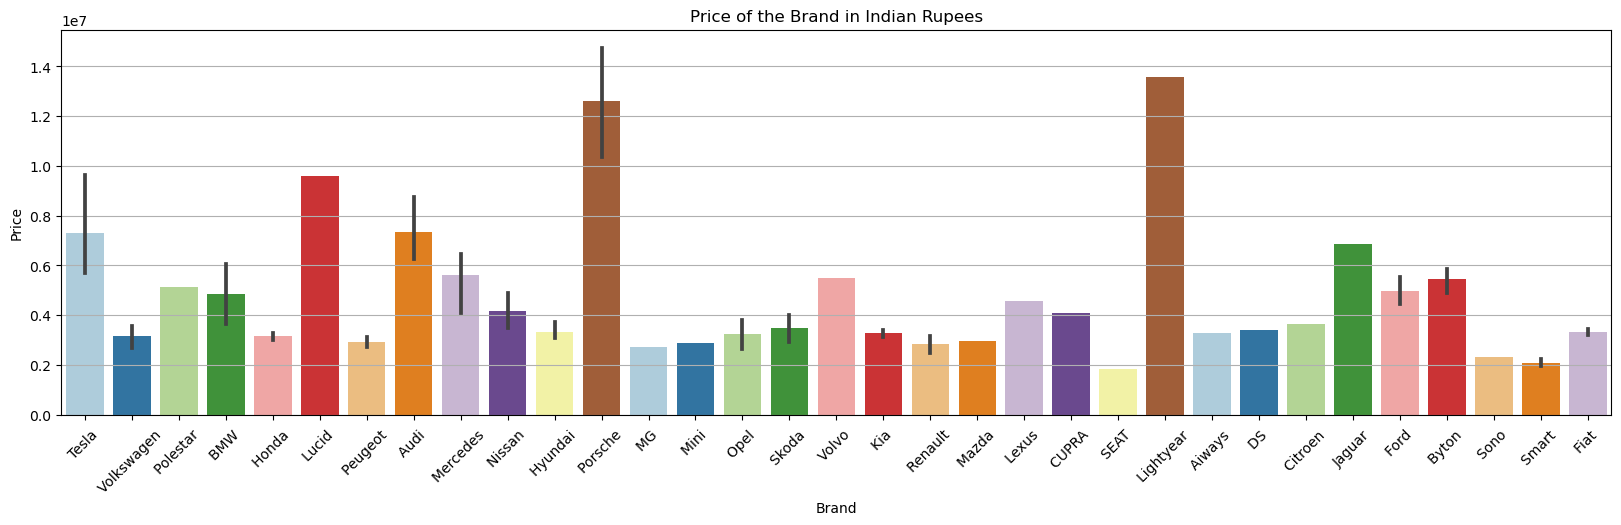

In [18]:
plt.figure(figsize=(20,5))
sns.barplot(x='Brand', y='inr(10e3)', data=df1, palette="Paired")
plt.grid(axis='y')
plt.title('Price of the Brand in Indian Rupees')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show

##### Lightyear, Porsche and Lucid are the most expensive and SEAT and Smart the least

Text(0.5, 1.0, 'Plug Type')

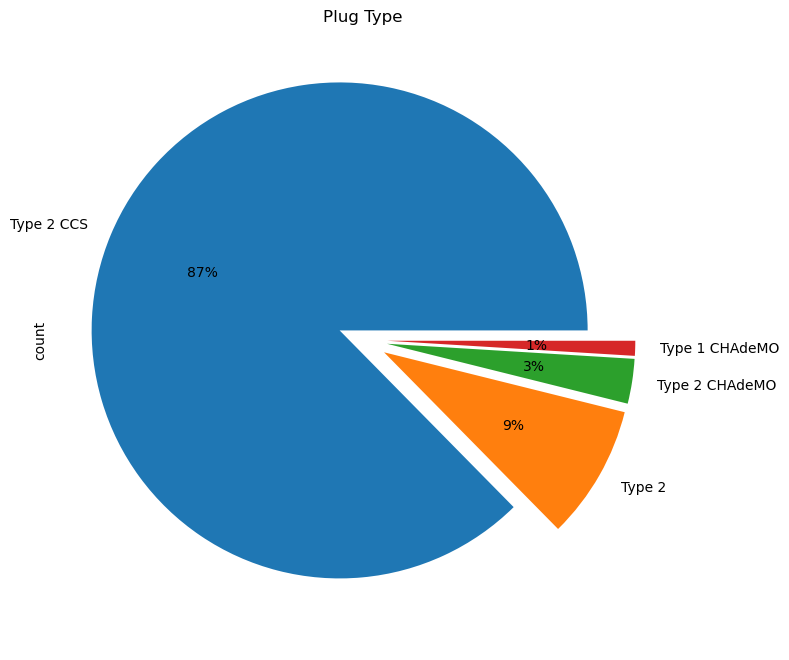

In [19]:
df1['PlugType'].value_counts().plot.pie(figsize=(8,15), color='dark',autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type') 

##### Most companies use Type 2 CCS and Type 1 CHAdeMo the least

Text(0.5, 1.0, 'BodyStyle')

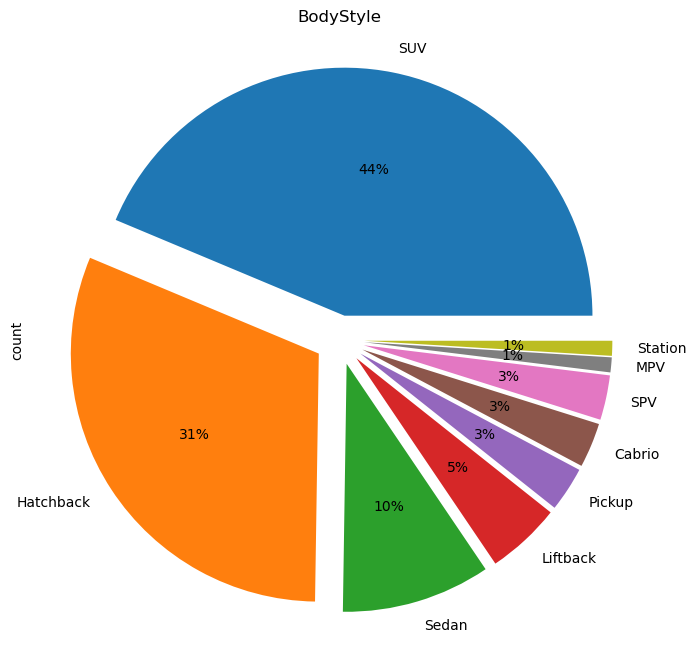

In [20]:
df1['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%', explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('BodyStyle')

##### Most cars used eiher SUV or Hatchback

Text(0.5, 1.0, 'Segment')

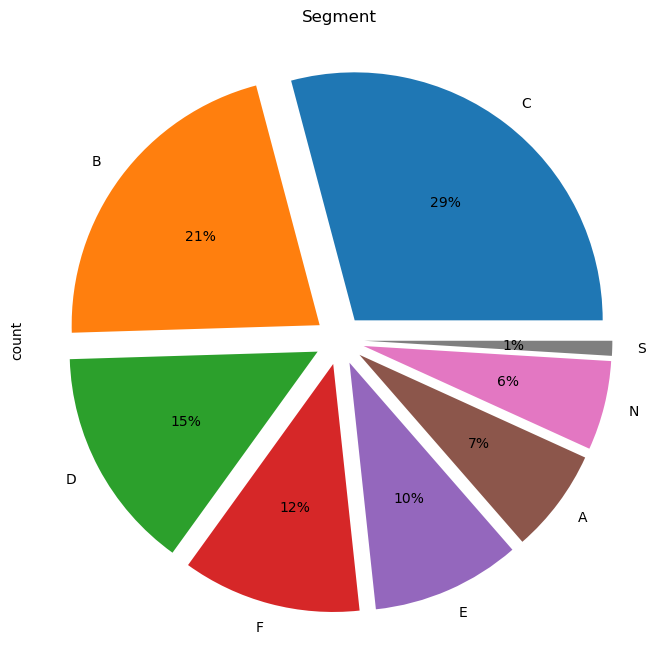

In [21]:
df1['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

##### The majority of the cars fall under B & C Segment 

Text(0.5, 1.0, 'Seats')

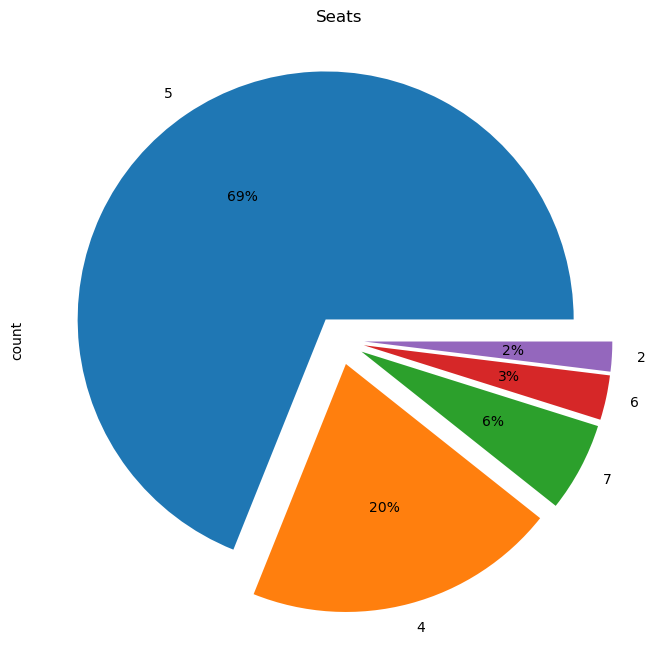

In [22]:
df1['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

#### The majority of cars are equipped with 5 seats.

In [23]:
df1['BodyStyle'].value_counts()

BodyStyle
SUV          45
Hatchback    32
Sedan        10
Liftback      5
Pickup        3
Cabrio        3
SPV           3
MPV           1
Station       1
Name: count, dtype: int64

In [24]:
df3= df1[["TopSpeed_KmH", "inr(10e3)"]].groupby("TopSpeed_KmH").count()
df4= df1[["Range_Km", "inr(10e3)"]].groupby("Range_Km").count()
df5= df1[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
df5.head()

TopSpeed_KmH
Range_Km              
95                   2
100                  1
130                  1
160                  1
170                  2

In [25]:
df3=df3.sort_values("TopSpeed_KmH",ascending = False).head(10)
df4=df4.sort_values("Range_Km",ascending = False).head(10)
df5=df5.sort_values("Range_Km",ascending = False).head(10)
df5.head()

TopSpeed_KmH
Range_Km              
970                  1
750                  1
610                  1
575                  1
515                  1

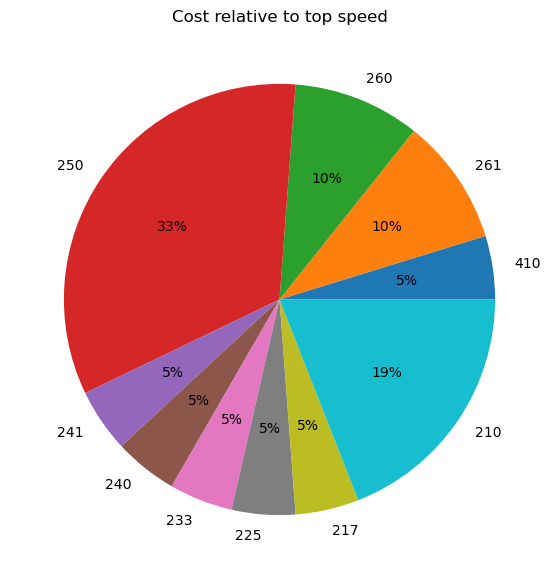

In [26]:

plt.figure(figsize=(10,7))
plt.title('Cost relative to top speed')
plt.pie(x=df3["inr(10e3)"],labels=df3.index,autopct='%1.0f%%')
plt.show()

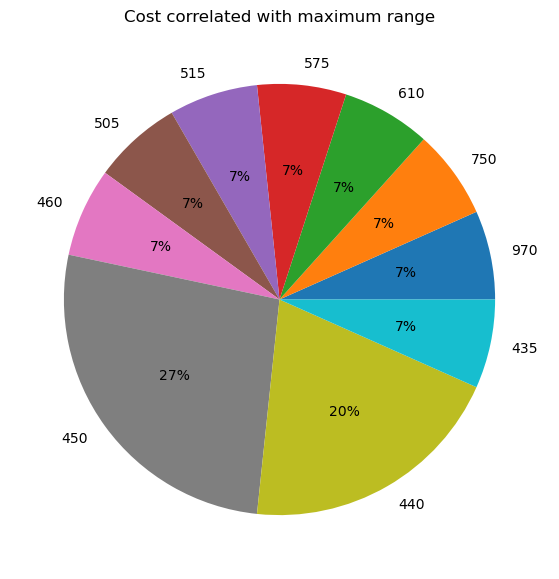

In [27]:
plt.figure(figsize=(10,7))
plt.title('Cost correlated with maximum range')
plt.pie(x=df4["inr(10e3)"],labels=df4.index,autopct='%1.0f%%')
plt.show()

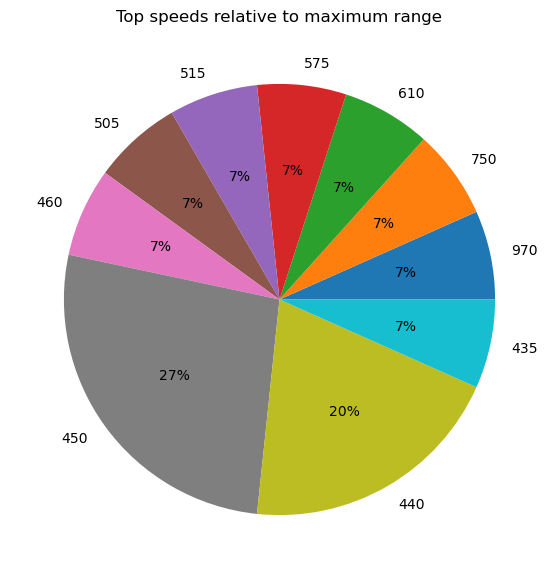

In [28]:
plt.figure(figsize=(10,7))
plt.title('Top speeds relative to maximum range')
plt.pie(x=df5["TopSpeed_KmH"],labels=df5.index,autopct='%1.0f%%')
plt.show()

#### Spiliting  the data 

In [29]:
df1['PowerTrain'].unique()

array(['AWD', 'RWD', 'FWD'], dtype=object)

In [17]:
# encoding the categorical features

# PowerTrain feature
df1['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
# RapidCharge feature
df1['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

C:\Users\Lenovo_ThinkPad\AppData\Local\Temp\ipykernel_5368\899744246.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Lenovo_ThinkPad\AppData\Local\Temp\ipykernel_5368\899744246.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    int64  
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(7), object(6)
memory usage: 12.2+ KB


In [9]:
x=df1[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm']]
y=df1['inr(10e3)']

In [10]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [11]:
pd.DataFrame(x_scaled)

0         1         2         3
0   -0.931186  0.886862  1.240881 -0.957247
1    0.867167 -0.548531 -0.442660 -0.753325
2   -0.897883  0.488142  0.710450 -0.277506
3   -0.198524  0.169166  0.018584  0.572171
4    0.700653 -1.345971 -0.788593 -0.719338
..        ...       ...       ...       ...
98   0.034596 -0.070066 -0.442660  0.062365
99  -0.964489 -0.030194  0.710450  2.339498
100 -0.498249 -0.109938  0.479828  0.164326
101 -0.764672  0.288782  0.479828  1.455834
102  0.034596  0.488142  0.249206  1.659757

[103 rows x 4 columns]

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [49]:
model=LinearRegression()
x_lr=model.fit(x_train,y_train)


In [50]:
## Prediction 
y_pred=model.predict(x_test)

In [51]:
# Model evaluation
mse=mean_squared_error(y_pred,y_test)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2*100)

Mean Squared Error: 2723355763684.096
R^2 Score: 58.703224485930065


In [55]:
y1=df1[['RapidCharge']]
x1=df1[['inr(10e3)']]

In [56]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=42)

In [57]:
Logistic_model=LogisticRegression()
Logistic_model.fit(X1_train,y1_train)


C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [58]:
logistic_pred=Logistic_model.predict(X1_test)

In [62]:
logistic_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [64]:
cm = confusion_matrix(y1_test, logistic_pred)
cm

array([[21]], dtype=int64)

In [68]:
## Finding the accuracy score
accuracy_score(y1_test, logistic_pred)*100

100.0

### Applying PCA

In [54]:

# selecting features for building a model
X = df1[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]
y=df1['inr(10e3)']

In [24]:
# Replace '-' with NaN
df1.replace('-', np.nan, inplace=True)

In [26]:
# Example: Convert all columns except the target column to numeric
#df1 = df1.apply(pd.to_numeric, errors='coerce')

In [28]:
#df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            0 non-null      float64
 1   Model            1 non-null      float64
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   98 non-null     float64
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    int64  
 9   PlugType         0 non-null      float64
 10  BodyStyle        0 non-null      float64
 11  Segment          0 non-null      float64
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 12.2 KB


In [29]:
#df1.fillna(df1.mean(), inplace=True)

In [43]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42)

In [58]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.302486  0.783301 -0.954275  0.989265  1.138223 -1.354160  0.321537   
1 -2.018473 -0.581596 -0.653248  0.460094 -0.444308  0.460226 -0.404792   
2  1.505058  0.076629 -0.365369 -0.033308  0.687635 -0.767993  0.240895   
3  0.209754  0.099043 -0.055613  0.859807 -1.374592  0.199591 -0.402094   
4 -2.661820  0.099675 -0.825347 -0.665051 -0.841197  0.179900 -0.485887   

        PC8       PC9  
0  0.483683 -0.436786  
1 -0.190068 -0.302110  
2 -0.140845 -0.093663  
3  0.360348  0.158567  
4  0.015561 -0.152315

In [45]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment

In [46]:
wcss

[927.0000000000002,
 592.9797004226509,
 448.89713734701445,
 363.6005679521051,
 315.4295030581483,
 273.4009434957039,
 254.85557426955324,
 219.54717965963314,
 197.41035885841575,
 181.9256800642554]

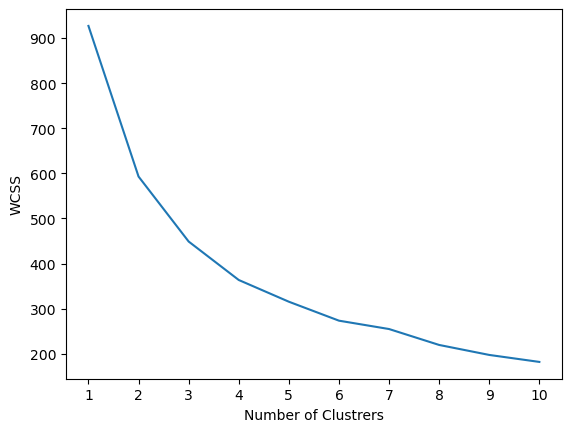

In [47]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [48]:
kmeans=KMeans(n_clusters=4,init="k-means++")

In [49]:
kmeans.fit_predict(X_pca)

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 3, 0, 1, 0, 2, 2, 2, 0, 1,
       0, 2, 3, 2, 0, 2, 1, 2, 0, 0, 2, 3, 2, 1, 0, 2, 3, 0, 2, 0, 2, 2,
       2, 0, 2, 3, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2])

In [59]:
y_pred=kmeans.predict(X_test)

In [60]:
y_pred

array([2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 3, 0, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0])

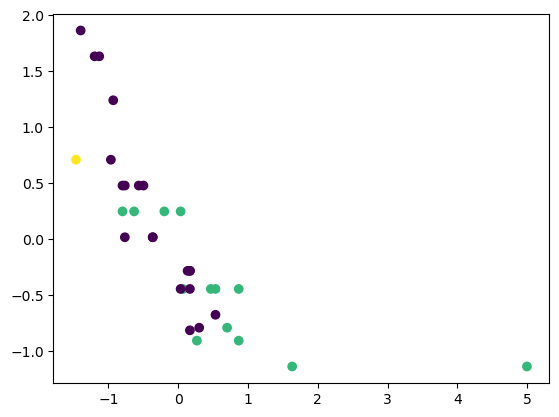

In [61]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)